In [1]:
from latentmi import lmi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc 
from tqdm.notebook import tqdm
import os

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]="false"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]=".10"
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"]="platform"
from bmi.estimators import MINEEstimator as MINE
from bmi.estimators import InfoNCEEstimator as InfoNCE
from bmi.estimators import CCAMutualInformationEstimator as CCAMI

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/gokul/.local/lib/python3.10/site-packages/jaxtyping/__init__.py:210: UserWarning: jaxtyping version >=0.2.23 should be used with Equinox version >=0.11.1
  warnings.warn(


In [2]:
# base dir
embeddings_dir = '../embeddings/PBMC_CITEseq/'
results = []

# estimators config
estimators = [
    ('LMI', lambda x, y: np.nanmean(lmi.estimate(x, y, quiet=True, batch_size=2048)[0])),
    ('InfoNCE', lambda x, y: InfoNCE(verbose=True).estimate(x, y)),
    ('MINE', lambda x, y: MINE(verbose=True).estimate(x, y)),
    # ('Parametric', lambda x, y: CCAMI().estimate(x, y))
]

# loop over subdirs
for quality_dir in os.listdir(embeddings_dir):
    quality_path = os.path.join(embeddings_dir, quality_dir)
    if not os.path.isdir(quality_path): continue

    held_out = sc.read_h5ad(os.path.join(quality_path, 'held_out_cells.h5ad'))
    UMI_per_cell = held_out.raw.X.sum() / len(held_out)

    Ys_dict = {
        'protein': held_out.obsm['protein_counts'],
        'celltype_coarse': pd.get_dummies(held_out.obs['celltype.l1']).to_numpy(),
        'celltype_fine': pd.get_dummies(held_out.obs['celltype.l3']).to_numpy()
    }

    for file in tqdm(os.listdir(quality_path), desc=f'processing {quality_dir}'):
        if not file.endswith('.npy'): continue

        method, frac = file.split('_')
        frac = frac[4:-4]
        if method != 'VAE' or frac != '1.000': continue

        Xs = np.load(os.path.join(quality_path, file))

        for y_label, Ys in Ys_dict.items():
            for name, func in estimators:
                mi = func(Xs, Ys)
                results.append({
                    'Quality': quality_dir.split('_')[0],
                    'UMI per cell': UMI_per_cell,
                    'Replicate': quality_dir.split('_')[1],
                    'Fraction': float(frac),
                    'Cell number': int(float(frac) * 3 * len(held_out)),
                    'Method': method,
                    'MI': mi,
                    'Estimator': name,
                    'Target': y_label
                })

        print(results)

processing Q0.001_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 212 (of max 300) 🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:09<01:06, 131.95step/s, test=0.13, train=0.16]


epoch 200 (of max 300) 🌻🌻🌻🌻🌻🌻

 15%|███████▊                                            | 1500/10000 [00:10<01:01, 139.19step/s, test=0.23, train=0.34]


epoch 224 (of max 300) 🌻🌻🌻🌻🌻🌻🌻

 18%|█████████                                           | 1750/10000 [00:15<01:13, 112.49step/s, test=0.24, train=0.16]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.002_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 252 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:11<01:22, 105.94step/s, test=0.30, train=0.36]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 15%|███████▊                                            | 1500/10000 [00:13<01:15, 112.95step/s, test=0.42, train=0.43]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 25%|█████████████                                       | 2500/10000 [00:22<01:06, 112.55step/s, test=0.46, train=0.53]


 15%|███████▊                                            | 1500/10000 [00:12<01:12, 117.51step/s, test=0.43, train=0.49]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.005_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:08<01:02, 140.55step/s, test=0.58, train=0.64]


epoch 264 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:11<01:20, 108.82step/s, test=0.67, train=0.70]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 28%|██████████████▎                                     | 2750/10000 [00:23<01:02, 115.13step/s, test=0.70, train=0.70]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.010_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 28%|██████████████▌                                      | 2750/10000 [00:31<01:21, 88.48step/s, test=1.10, train=1.24]


 12%|██████▌                                             | 1250/10000 [00:11<01:17, 113.61step/s, test=0.75, train=1.03]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 18%|█████████                                           | 1750/10000 [00:15<01:12, 113.16step/s, test=0.92, train=0.97]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 32%|████████████████▉                                   | 3250/10000 [00:23<00:48, 139.22step/s, test=0.97, train=1.10]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.022_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:08<01:02, 139.92step/s, test=1.05, train=1.15]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:09<01:05, 132.78step/s, test=1.09, train=1.24]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 15%|███████▊                                            | 1500/10000 [00:10<01:01, 137.68step/s, test=1.19, train=1.30]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.046_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 20%|██████████▍                                         | 2000/10000 [00:18<01:13, 109.50step/s, test=0.18, train=0.24]


  8%|███▉                                                | 750/10000 [00:05<01:11, 129.60step/s, test=-0.00, train=0.00]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:08<01:00, 144.09step/s, test=1.20, train=1.34]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 15%|███████▊                                            | 1500/10000 [00:10<00:59, 142.12step/s, test=1.48, train=1.56]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.100_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 15%|███████▋                                           | 1500/10000 [00:11<01:05, 129.69step/s, test=-0.00, train=0.00]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 18%|█████████                                           | 1750/10000 [00:12<00:59, 137.52step/s, test=1.30, train=1.49]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 10%|█████▏                                              | 1000/10000 [00:07<01:05, 137.60step/s, test=1.52, train=1.56]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.215_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 22%|███████████▋                                        | 2250/10000 [00:16<00:56, 138.14step/s, test=2.06, train=2.43]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 22%|███████████▋                                        | 2250/10000 [00:15<00:54, 142.73step/s, test=1.41, train=1.54]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 15%|███████▊                                            | 1500/10000 [00:11<01:06, 127.73step/s, test=1.91, train=1.74]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q0.464_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 22%|███████████▋                                        | 2250/10000 [00:20<01:10, 109.90step/s, test=2.47, train=2.64]


 12%|██████▌                                             | 1250/10000 [00:09<01:08, 127.52step/s, test=1.94, train=1.97]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 12%|██████▌                                             | 1250/10000 [00:08<01:01, 143.36step/s, test=1.48, train=1.70]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 15%|███████▊                                            | 1500/10000 [00:10<01:00, 141.08step/s, test=1.89, train=1.91]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

processing Q1.000_rep0:   0%|          | 0/59 [00:00<?, ?it/s]

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 22%|███████████▍                                       | 2250/10000 [00:20<01:11, 108.67step/s, test=-0.36, train=0.67]


 18%|████████▉                                          | 1750/10000 [00:13<01:03, 129.73step/s, test=-0.06, train=0.45]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 28%|██████████████▎                                     | 2750/10000 [00:19<00:52, 137.86step/s, test=1.46, train=1.37]


epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

 28%|██████████████▎                                     | 2750/10000 [00:18<00:49, 145.55step/s, test=2.16, train=1.81]


[{'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.34937688034671394, 'Estimator': 'LMI', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2252216339111328, 'Estimator': 'InfoNCE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.1390804648399353, 'Estimator': 'MINE', 'Target': 'protein'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.2481429979765267, 'Estimator': 'LMI', 'Target': 'celltype_coarse'}, {'Quality': 'Q0.001', 'UMI per cell': 8.16636860929939, 'Replicate': 'rep0', 'Fraction': 1.0, 'Cell number': 114072, 'Method': 'VAE', 'MI': 0.25594043731689453, 'Estimator': 'In

In [3]:
df = pd.DataFrame(results)
df

,Quality,UMI per cell,Replicate,Fraction,Cell number,Method,MI,Estimator,Target
0,Q0.001,8.166369,rep0,1.0,114072,VAE,0.349377,LMI,protein
1,Q0.001,8.166369,rep0,1.0,114072,VAE,0.225222,InfoNCE,protein
2,Q0.001,8.166369,rep0,1.0,114072,VAE,0.139080,MINE,protein
3,Q0.001,8.166369,rep0,1.0,114072,VAE,0.248143,LMI,celltype_coarse
4,Q0.001,8.166369,rep0,1.0,114072,VAE,0.255940,InfoNCE,celltype_coarse
...,...,...,...,...,...,...,...,...,...
85,Q1.000,8153.868320,rep0,1.0,114072,VAE,1.626199,InfoNCE,celltype_coarse
86,Q1.000,8153.868320,rep0,1.0,114072,VAE,1.472757,MINE,celltype_coarse
87,Q1.000,8153.868320,rep0,1.0,114072,VAE,3.678416,LMI,celltype_fine
88,Q1.000,8153.868320,rep0,1.0,114072,VAE,2.482866,InfoNCE,celltype_fine


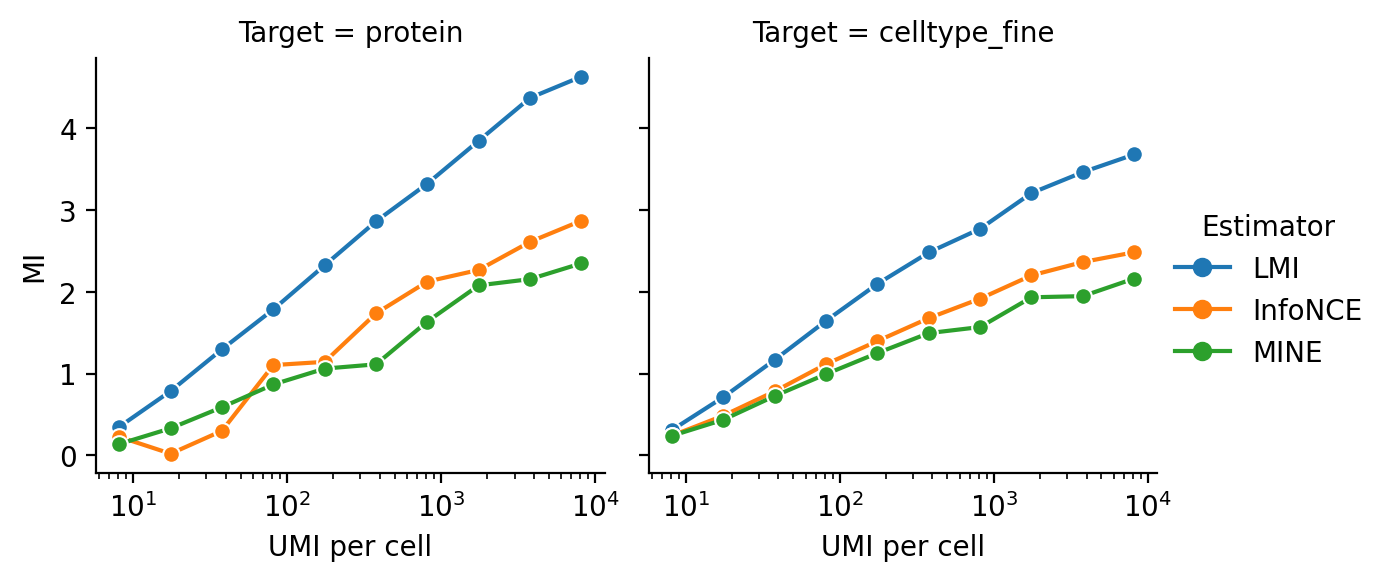

In [11]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 200
sns.relplot(data=df[df['Target'] != 'celltype_coarse'], x='UMI per cell', y='MI', hue='Estimator', 
            marker='o', col='Target', kind='line', aspect=1, height=3)
plt.xscale('log')

In [12]:
df.to_csv('../results/estimator_comparison.csv')